In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm

In [ ]:
def random_batch(skip_grams):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)

    for i in random_index:
        random_inputs.append(skip_grams[i][0])  # target
        random_labels.append(skip_grams[i][1])  # context word

    return random_inputs, random_labels

In [ ]:
sentences = """During my second month of nursing school, our professor gave us a pop quiz.  
I was a conscientious student and had breezed through the questions, until I read the last one: 
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke. 
I had seen the cleaning woman several times. She was tall, dark-haired and in her 50s, but how would I know her name?  
I handed in my paper, leaving the last question blank.  Before class ended, one student asked if the last question would count toward our quiz grade.  
“Absolutely,” said the professor.  “In your careers you will meet many people. All are significant. They deserve your attention and care, 
even if all you do is smile and say ‘hello’. I’ve never forgotten that lesson. I also learned her name was Dorothy.""".split()

In [ ]:
batch_size = 2 # mini-batch size
embedding_size = 10 # embedding size

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

voc_size = len(word_list)

window_size = 2

skip_grams = []
for i in range(window_size, len(word_sequence) - window_size):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - window_size]], word_dict[word_sequence[i + window_size]]]
    for w in context:
        skip_grams.append([target, w])

skip_grams[0]

[43, 51]

In [ ]:
I, O = random_batch(skip_grams)

In [ ]:
I

[75, 24]

In [ ]:
class skipgramModel(nn.Module):
    def __init__(self):
        super(skipgramModel, self).__init__()
        self.embedding = nn.Embedding(voc_size, embedding_size)
        self.W = nn.Linear(embedding_size, embedding_size, bias=False) 
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)

    def forward(self, X):
        embeddings = self.embedding(X)
        hidden_layer = nn.functional.relu(self.W(embeddings)) 
        output_layer = self.WT(hidden_layer)
        return output_layer

    def get_word_emdedding(self, word):
        word = torch.tensor([word_dict[word]])
        return self.embedding(word).view(1,-1)

In [ ]:
model = skipgramModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
for epoch in tqdm(range(150000), total=len(skip_grams)):
    input_batch, target_batch = random_batch(skip_grams)
    input_batch = torch.LongTensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 10000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward(retain_graph=True)
    optimizer.step()

10171it [00:07, 1330.55it/s]

Epoch: 10000 cost = 1.062543


20208it [00:15, 1347.85it/s]

Epoch: 20000 cost = 0.444483


30161it [00:22, 1349.31it/s]

Epoch: 30000 cost = 0.867431


40133it [00:30, 1329.07it/s]

Epoch: 40000 cost = 0.963096


50220it [00:38, 1309.34it/s]

Epoch: 50000 cost = 1.423180


60128it [00:45, 1280.51it/s]

Epoch: 60000 cost = 0.822342


70145it [00:53, 1293.01it/s]

Epoch: 70000 cost = 1.984433


80139it [01:01, 1334.73it/s]

Epoch: 80000 cost = 2.139242


90217it [01:08, 1324.62it/s]

Epoch: 90000 cost = 1.043241


100215it [01:16, 1289.52it/s]

Epoch: 100000 cost = 0.403268


110128it [01:24, 1271.62it/s]

Epoch: 110000 cost = 1.198132


120239it [01:32, 1316.70it/s]

Epoch: 120000 cost = 0.456162


130196it [01:39, 1240.23it/s]

Epoch: 130000 cost = 0.690428


140173it [01:47, 1259.46it/s]

Epoch: 140000 cost = 3.009590


150000it [01:55, 1299.90it/s]

Epoch: 150000 cost = 1.021717


In [ ]:
def Skipgram_test(test_data, model):
    correct_ct = 0

    for i in range(len(test_data)):
        input_batch, target_batch = random_batch(test_data)
        input_batch = torch.LongTensor(input_batch)
        target_batch = torch.LongTensor(target_batch)

        model.zero_grad()
        _, predicted = torch.max(model(input_batch), 1)




        if predicted[0] == target_batch[0]:
                correct_ct += 1

    print('Accuracy: {:.1f}% ({:d}/{:d})'.format(correct_ct/len(test_data)*100, correct_ct, len(test_data)))

In [ ]:
Skipgram_test(skip_grams, model)

Accuracy: 37.3% (103/276)


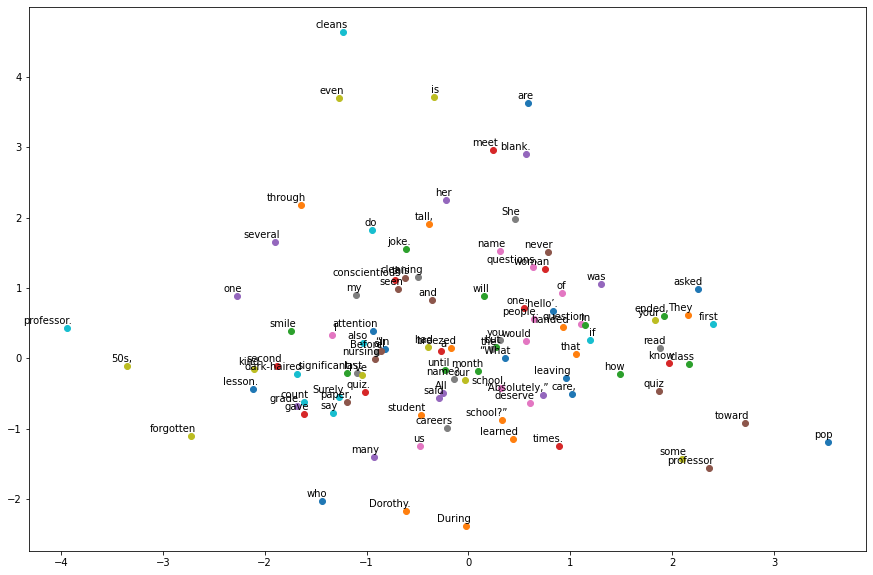

In [ ]:
plt.figure(figsize=(15,10))
for w in word_list:
    x = model.get_word_emdedding(w).detach().data.numpy()[0][0]
    y = model.get_word_emdedding(w).detach().data.numpy()[0][1]
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [ ]:
pred = "Surely".split()

In [ ]:
word_dict_inverse = {i:w for w, i in word_dict.items()}


In [ ]:
model_pred = []
e = 0
model_pred.append(pred[0])

while e<6:
    word = word_dict_inverse[torch.argmax(model(torch.LongTensor([word_dict[model_pred[-1]]]))).item()]
    model_pred.append(word)
    e+=1

' '.join(model_pred)

'Surely was dark-haired in I how 50s,'